In [1]:
import tensorflow as tf

In [2]:
import os
import sys
import collections

In [3]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
a = os.path.join(module_path, "strands_qsr_lib\qsr_lib\src3")

sys.path.append(a)

In [5]:
from rl import action_learner

In [6]:
from rl import value_estimator

In [7]:
from progress_learner import EventProgressEstimator

In [8]:
import config
import project
# Need to add this import to load class
from project import Project

In [9]:
from importlib import reload

In [10]:
# To load this, I have to add pickle.load(f, encoding='latin-1')
# Otherwise it would give the bug
# https://stackoverflow.com/questions/21129020/how-to-fix-unicodedecodeerror-ascii-codec-cant-decode-byte
p = project.Project.load("../slidearound_hopstep_1.proj")

In [11]:
reload(config)
    
c = config.Config()

In [12]:
from rl import block_movement_env

In [48]:
reload(action_learner)


<module 'rl.action_learner' from 'D:\\git\\learn-to-perform\\rl\\action_learner.py'>

In [77]:
reload(value_estimator)

<module 'rl.value_estimator' from 'D:\\git\\learn-to-perform\\rl\\value_estimator.py'>

In [33]:
p.speed

0.083696821297196897

In [13]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

## Test progress_estimator in a simulator

In [14]:
reload(block_movement_env)
tf.reset_default_graph()

sess =  tf.Session()

with tf.variable_scope("model") as scope:
    print('-------- Load progress model ---------')
    progress_estimator = EventProgressEstimator(is_training=False, name = p.name, config = c)  

saver = tf.train.Saver()
saver.restore(sess, '../progress.mod')

env = block_movement_env.BlockMovementEnv(c, p.speed, name = 'SlideAround', 
                       progress_estimator = progress_estimator, session = sess)

-------- Load progress model ---------
self.inputs.shape = (?, 20, 100)  after linear layer
output.shape = (10, 100) after LSTM
self.output.shape = (10,) after linear
self._targets.shape = (?,) 
INFO:tensorflow:Restoring parameters from ../progress.mod


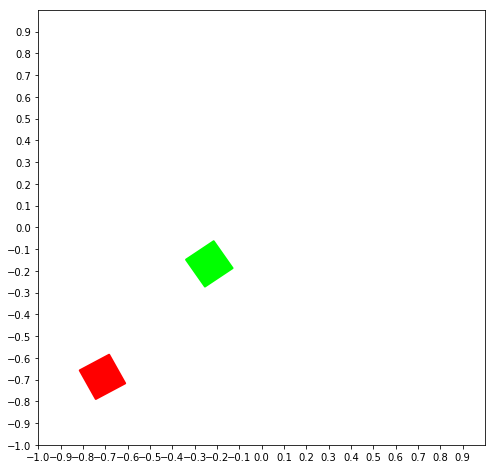

In [15]:
env.default()
env.render()

(21, 6)
Feature shape = (21, 13)
progress = 0.10


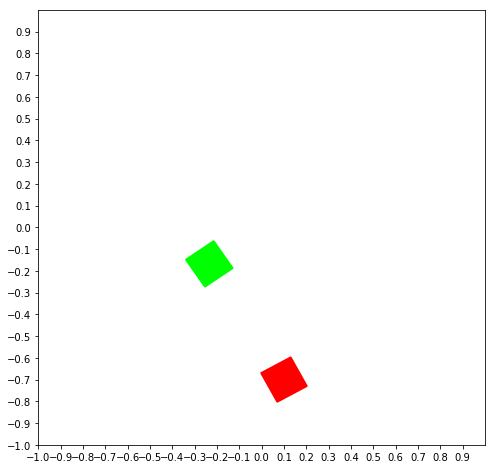

In [16]:
env.step((0, [0.1, -0.7, 0.5]))
env.render()

(21, 6)
Feature shape = (21, 13)
progress = 0.34


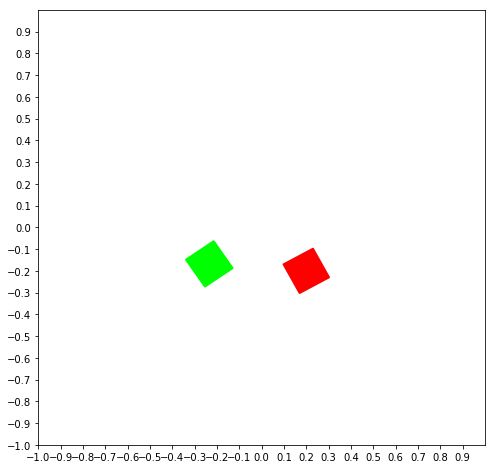

In [17]:
env.step((0, [0.2, -0.2, 0.5]))
env.render()

(21, 6)
Feature shape = (21, 13)
progress = 0.70


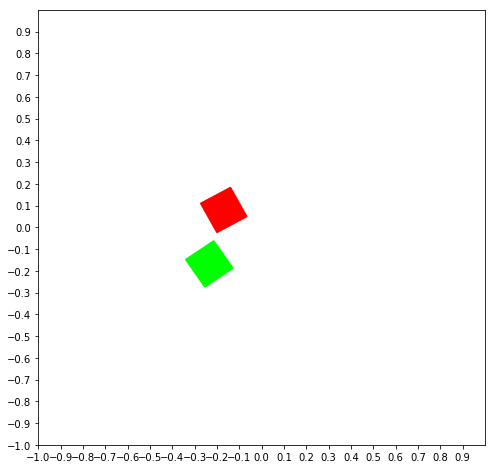

In [18]:
env.step((0, [-0.17, 0.08, 0.5]))
env.render()

(21, 6)
Feature shape = (21, 13)
progress = 0.76


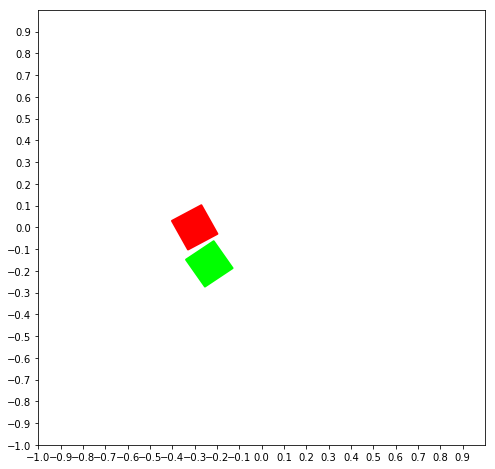

In [19]:
env.step((0, [-0.3, 0, 0.5]))
env.render()

## Run reinforce algorithm

In [82]:
reload(config)
    
c = config.Config()
reload(block_movement_env)
reload(value_estimator)
reload(action_learner)
tf.reset_default_graph()

global_step = tf.Variable(0, name="global_step", trainable=False)

with tf.Session() as sess:
    policy_est = value_estimator.PolicyEstimator(c)
    value_est = value_estimator.ValueEstimator(c)
    
    sess.run(tf.global_variables_initializer())
    
    with tf.variable_scope("model") as scope:
        print('-------- Load progress model ---------')
        progress_estimator = EventProgressEstimator(is_training=False, name = p.name, config = c)  
    
    # Print out all variables that would be restored
    for variable in tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='model'):
        print (variable.name)

    saver = tf.train.Saver(tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='model'))
    saver.restore(sess, '../progress.mod')
    
    action_ln = action_learner.ActionLearner(c, p, progress_estimator, 
                                   policy_est, value_est)
    
    action_policy = action_learner.random_action
    stats = action_ln.reinforce(action_policy, verbose = False)

-------- Load progress model ---------
self.inputs.shape = (?, 20, 100)  after linear layer
output.shape = (10, 100) after LSTM
self.output.shape = (10,) after linear
self._targets.shape = (?,) 
model/SlideAround/linear/weight:0
model/SlideAround/linear/bias:0
model/SlideAround/lstm/rnn/multi_rnn_cell/cell_0/basic_lstm_cell/kernel:0
model/SlideAround/lstm/rnn/multi_rnn_cell/cell_0/basic_lstm_cell/bias:0
model/SlideAround/output_linear/weight:0
model/SlideAround/output_linear/bias:0
INFO:tensorflow:Restoring parameters from ../progress.mod
Step 19 @ Episode 200/200 (0.0590457571670413)2)

In [51]:
import plotting

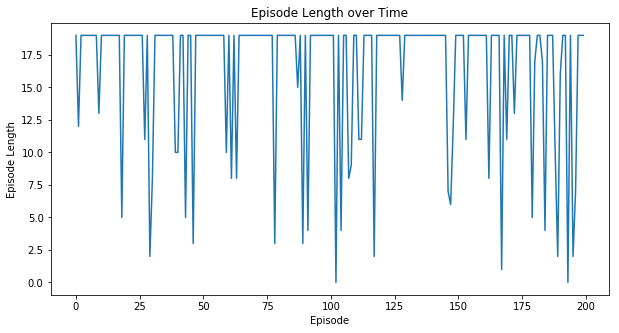

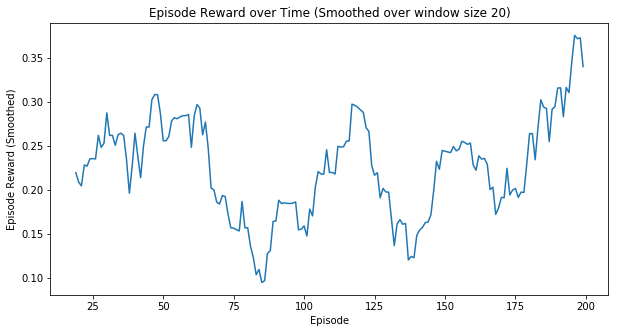

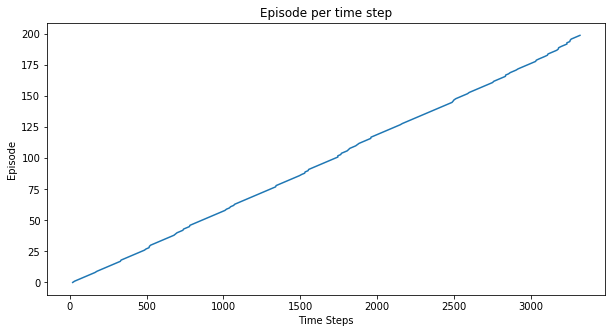

(<matplotlib.figure.Figure at 0x1cfc5d94f98>,
 <matplotlib.figure.Figure at 0x1cfc7ab8198>)

In [83]:
plotting.plot_episode_stats(stats, smoothing_window=20)

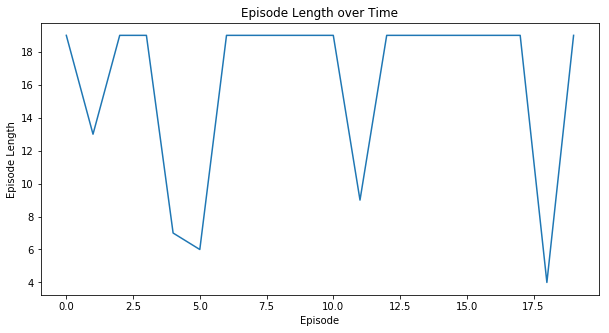

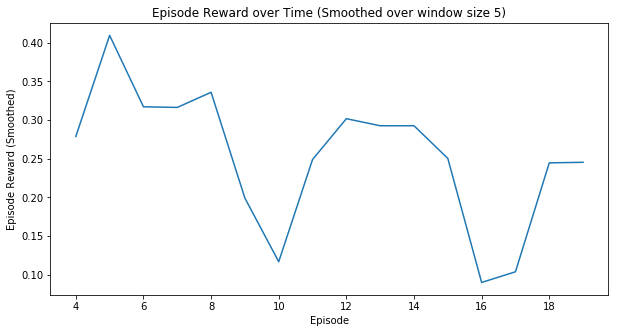

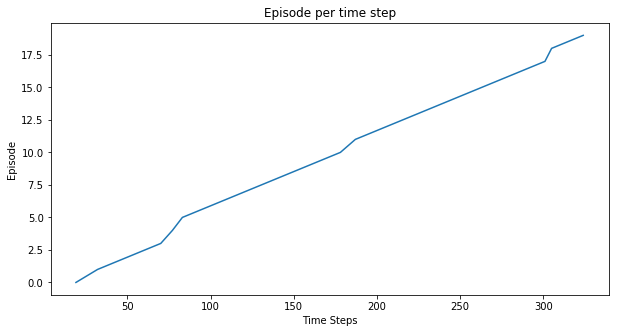

(<matplotlib.figure.Figure at 0x1cfac9ecc50>,
 <matplotlib.figure.Figure at 0x1cfaf5c56a0>)

In [37]:
plotting.plot_episode_stats(stats, smoothing_window=5)

In [47]:
type(stats)

plotting.Stats

In [50]:
print (plotting.__file__)

D:\git\learn-to-perform\notebooks\plotting.py


In [52]:
import pickle

In [53]:
from plotting import EpisodeStats

In [57]:
with open('session.dat', 'rb') as f:
    stats = pickle.load(f, encoding='latin-1')

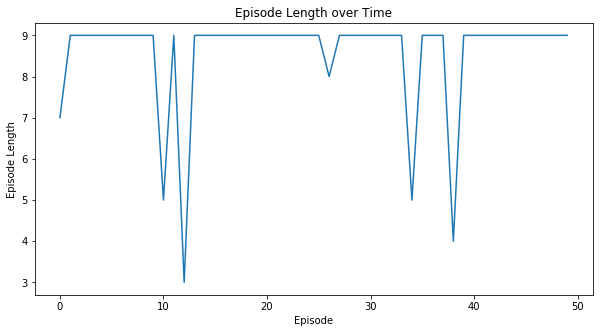

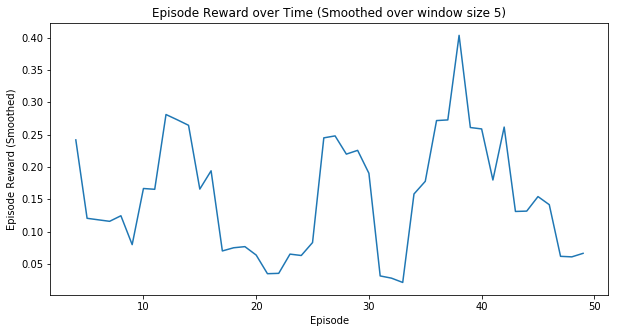

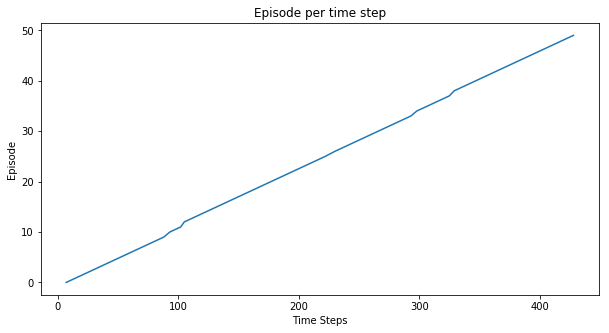

(<matplotlib.figure.Figure at 0x1cfb650a828>,
 <matplotlib.figure.Figure at 0x1cfb770cd68>)

In [58]:
plotting.plot_episode_stats(stats, smoothing_window=5)

In [59]:
with open('session.dat', 'rb') as f:
    stats = pickle.load(f, encoding='latin-1')

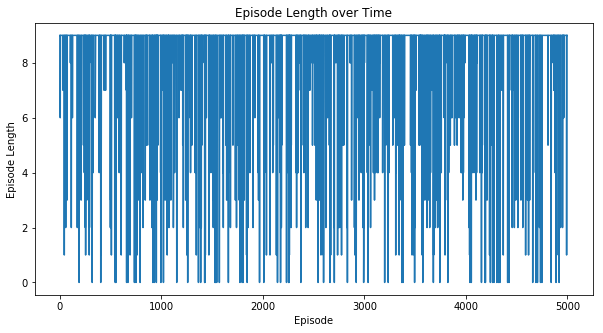

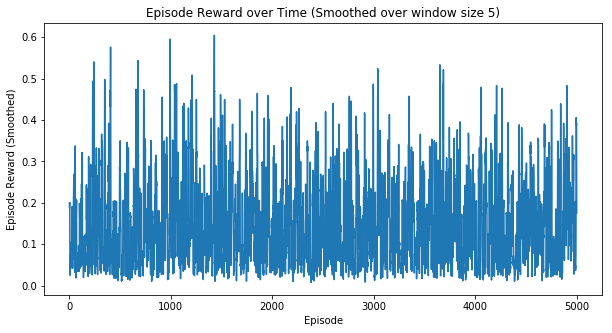

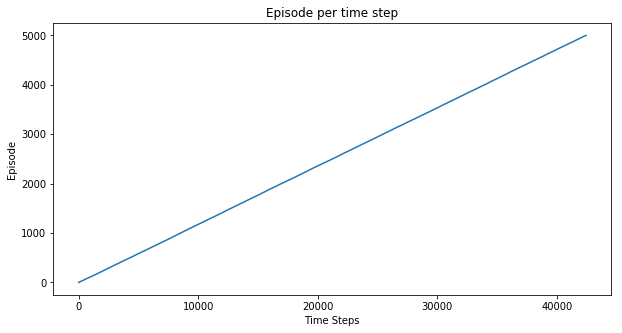

(<matplotlib.figure.Figure at 0x1cfb643ee80>,
 <matplotlib.figure.Figure at 0x1cfb63c7710>)

In [60]:
plotting.plot_episode_stats(stats, smoothing_window=5)